In [1]:
import numpy as np
import scipy.constants as const
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import date
from scipy.ndimage import gaussian_filter1d
%matplotlib inline


In [2]:
hum = pd.read_csv('humidity1.csv', names = ['DateTime','Sensor 1','Sensor 2'])
humNF = pd.read_csv('humidityFansOffAmbientAir.csv', names = ['DateTime','Sensor 1','Sensor 2'])

hum['Sensor 1'] = gaussian_filter1d(hum['Sensor 1'], 10)
hum['Sensor 2'] = gaussian_filter1d(hum['Sensor 2'], 5)
humNF['Sensor 1'] = gaussian_filter1d(humNF['Sensor 1'], 25)
humNF['Sensor 2'] = gaussian_filter1d(humNF['Sensor 2'], 25)
humNF = humNF[['Sensor 1','Sensor 2']]
hum = hum.loc[650:]
#df = df.loc[1780:4500]

array([[<AxesSubplot:>],
       [<AxesSubplot:>]], dtype=object)

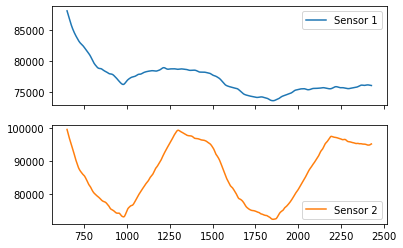

In [3]:
hum.plot(subplots=True, layout=(2,1))

array([[<AxesSubplot:>],
       [<AxesSubplot:>]], dtype=object)

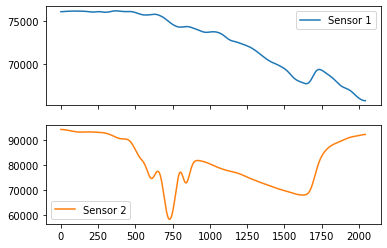

In [4]:
humNF.plot(subplots=True, layout=(2,1))

In [5]:
Humidity = [44.7,45.7,76.8,55.0,55.4,73.4, 54.4,55.2]
Index = [650,750,980,1300,1470,1820,2190,2450]

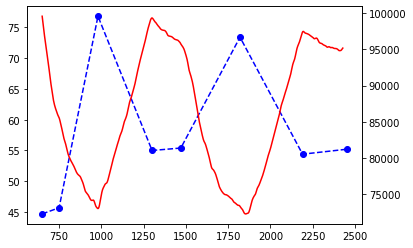

In [6]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(Index,Humidity,'--b', marker='o') #Piccaro
ax2.plot(hum.index,hum['Sensor 2'],'-r')     #Sensor

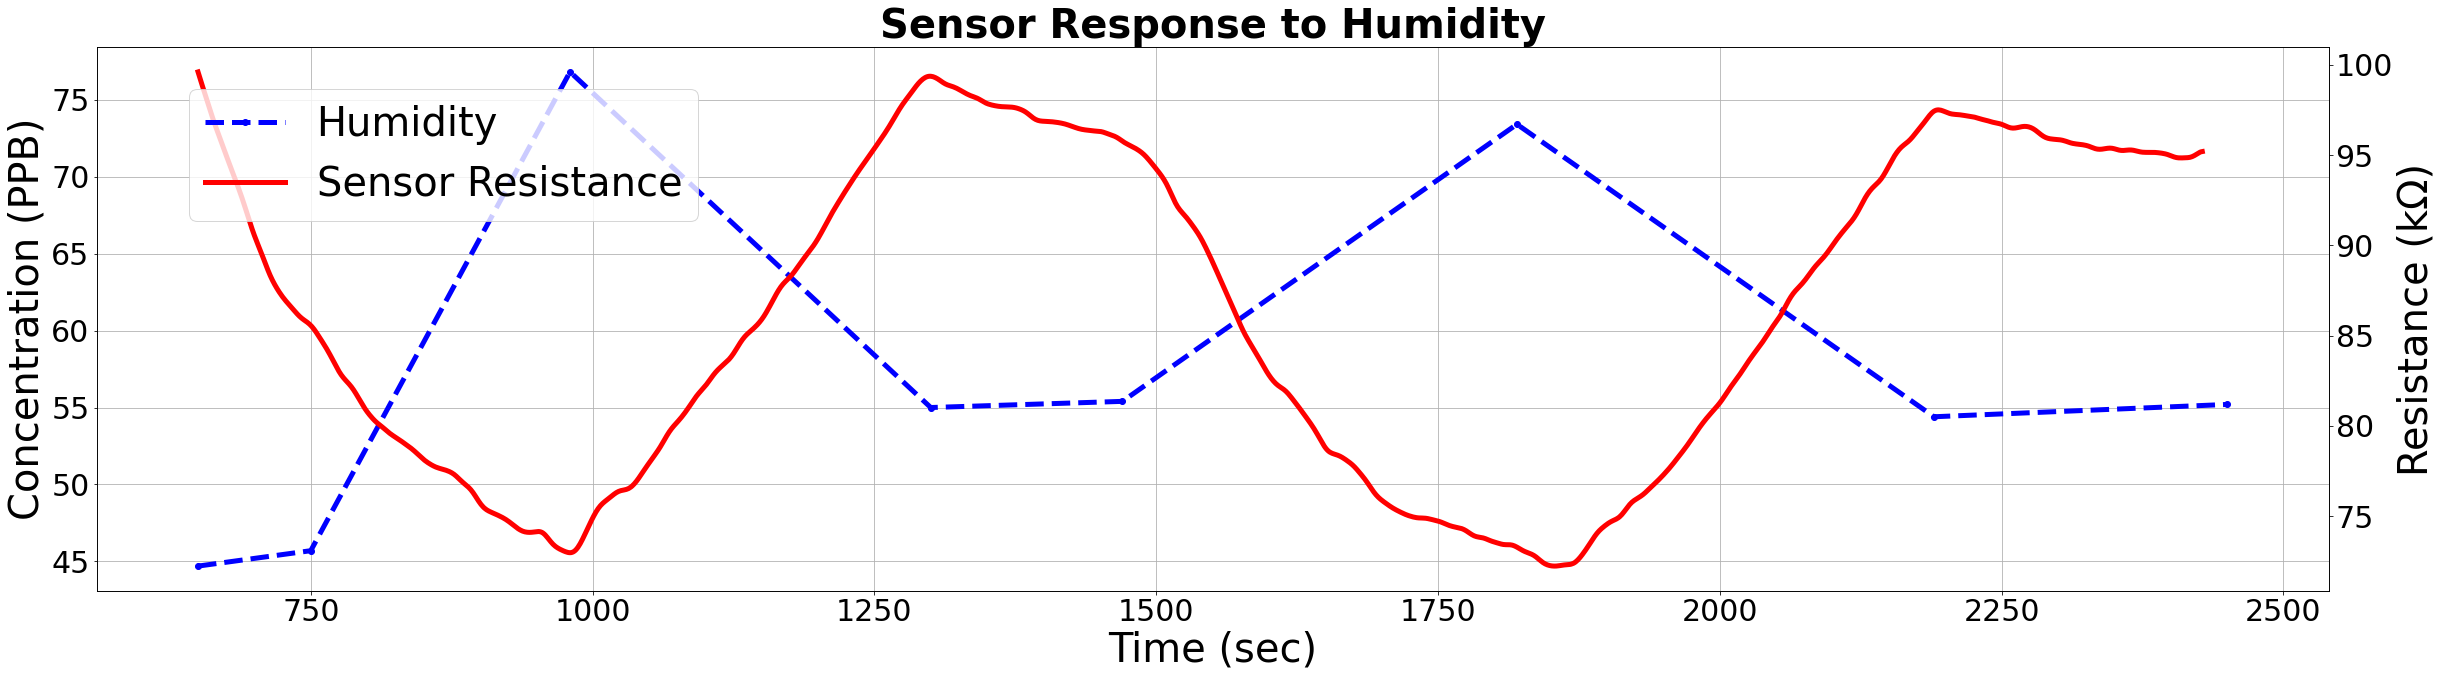

In [7]:
fig, ax1 = plt.subplots(figsize = (40,10))
ax2 = ax1.twinx()
ax1.grid()
ax1.plot(Index,Humidity,'--b', marker='o', label = 'Humidity', linewidth = 5) #Piccaro
ax2.plot(hum.index, hum['Sensor 2']/1000,'-r',label = 'Sensor Resistance', linewidth = 5)#Sensor
ax1.set_title('Sensor Response to Humidity', fontsize = 40, fontweight ='bold')
ax1.set_ylabel('Concentration (PPB)',fontsize = 40)
ax2.set_ylabel('Resistance (k\u03A9)',fontsize = 40)
ax1.tick_params( labelsize=30)
ax2.tick_params( labelsize=30)
ax1.set_xlabel('Time (sec)',fontsize = 40)
#ax2.set_xticklabels([0,5,10,15,20,25,30,35,40])
fig.legend(loc='upper left', bbox_to_anchor=(.15, .85), fontsize = 40)